In [2]:
import cv2
import matplotlib.pyplot as plt


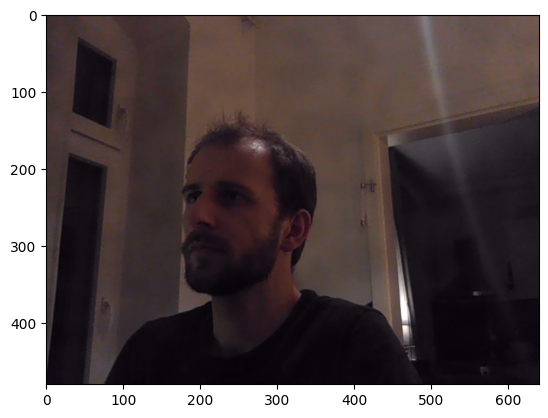

In [19]:
# Second cell - capture image
cap = cv2.VideoCapture(0)
cv2.waitKey(2000)
ret, frame = cap.read()
cap.release()

frame_rgb = None

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.show()
else:
    print("Failed to capture image")

(480, 640)


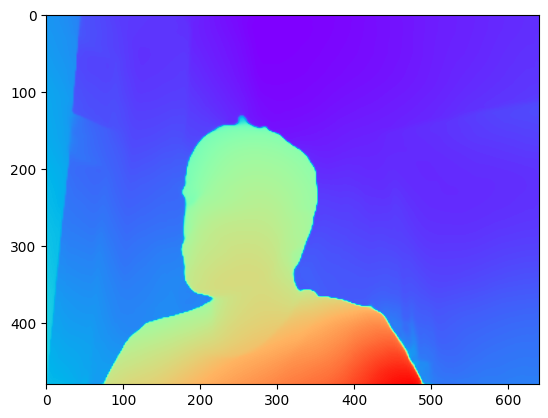

In [20]:
#sys.path.append('../pipeline/components/pc_generator')
from pipeline.components.pc_generator.DepthEstimator import DepthEstimator

depth_estimator = DepthEstimator()
depth = depth_estimator.predict(frame_rgb)
print(depth.shape)
plt.imshow(depth, cmap='rainbow')

## performance evaluation

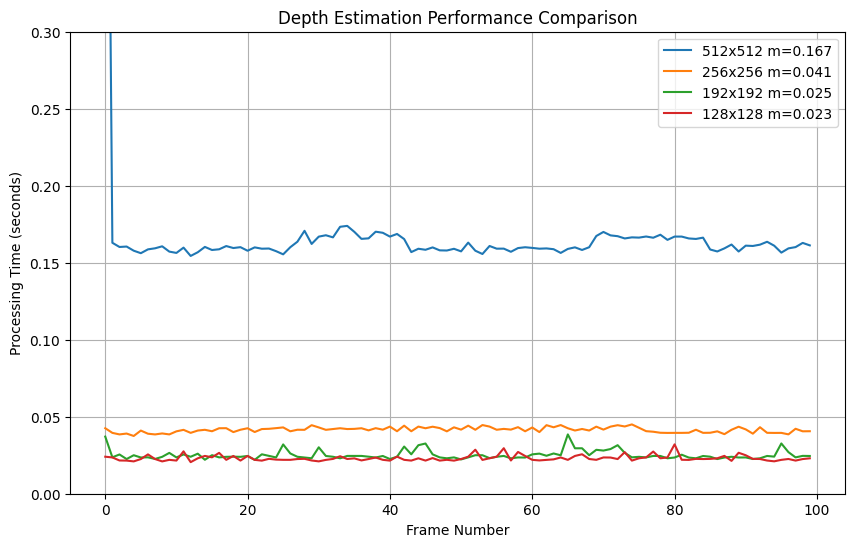

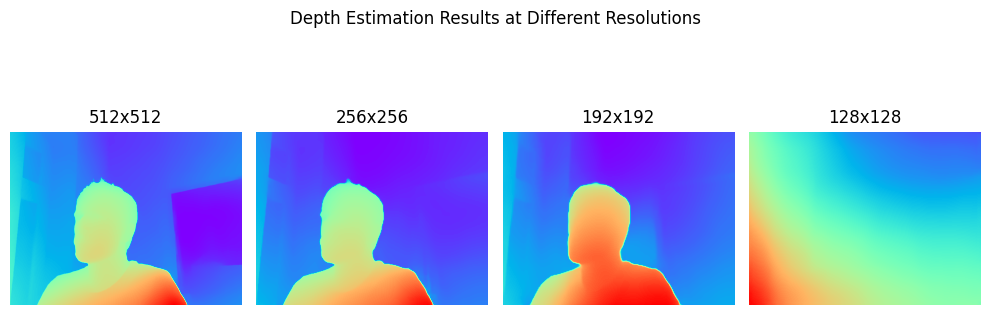

In [21]:
import time
import numpy as np

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise Exception("Could not open webcam")


def run_depth_estimation(input_size, frames = 100):
  times = []
  example_image = None
  depth_estimator = DepthEstimator(input_size=input_size)
  for i in range(frames):
    start_time = time.time()

    ret, frame = cap.read()
    depth = depth_estimator.predict(frame_rgb)
    end_time = time.time()

    if i == frames/2:
      example_image = depth

    times.append(end_time - start_time)
                    
  cap.release()
  cv2.destroyAllWindows()

  return times, example_image

times_a, image_a = run_depth_estimation(input_size=518)
times_b, image_b = run_depth_estimation(input_size=256)
times_c, image_c = run_depth_estimation(input_size=192)
times_d, image_d = run_depth_estimation(input_size=128)

# Plot performance comparison
plt.figure(figsize=(10,6))
plt.plot(times_a, label=f'512x512 m={np.mean(times_a):.3f}')
plt.plot(times_b, label=f'256x256 m={np.mean(times_b):.3f}')
plt.plot(times_c, label=f'192x192 m={np.mean(times_c):.3f}')
plt.plot(times_d, label=f'128x128 m={np.mean(times_d):.3f}')
plt.ylim(0, 0.3)
plt.xlabel('Frame Number')
plt.ylabel('Processing Time (seconds)')
plt.title('Depth Estimation Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot depth images
fig, axes = plt.subplots(1, 4, figsize=(10,4))
fig.suptitle('Depth Estimation Results at Different Resolutions')
axes[0].imshow(image_a, cmap='rainbow')
axes[0].set_title('512x512')
axes[0].axis('off')
axes[1].imshow(image_b, cmap='rainbow') 
axes[1].set_title('256x256')
axes[1].axis('off')
axes[2].imshow(image_c, cmap='rainbow')
axes[2].set_title('192x192') 
axes[2].axis('off')
axes[3].imshow(image_d, cmap='rainbow')
axes[3].set_title('128x128') 
axes[3].axis('off')

plt.tight_layout()
plt.show()
